In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("screentime.csv")

In [3]:
print(df.shape)

(9712, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [5]:
print(df.head())

   Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     Poor Sleep, Anx

In [5]:
df["Health_Impacts"] = df["Health_Impacts"].fillna("No Health Impact")

In [6]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nMissing percentage:\n", missing_percent[missing_percent > 0])


Missing percentage:
 Series([], dtype: float64)


In [16]:
print(df["Health_Impacts"].unique())

['Poor Sleep, Eye Strain' 'Poor Sleep' 'No Health Impact'
 'Poor Sleep, Anxiety' 'Poor Sleep, Obesity Risk' 'Eye Strain'
 'Obesity Risk' 'Anxiety' 'Poor Sleep, Anxiety, Obesity Risk'
 'Eye Strain, Obesity Risk' 'Eye Strain, Anxiety, Obesity Risk'
 'Anxiety, Obesity Risk' 'Poor Sleep, Eye Strain, Obesity Risk'
 'Poor Sleep, Eye Strain, Anxiety'
 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk' 'Eye Strain, Anxiety']


In [9]:
print("\nAfter cleaning:\n", df.isnull().sum())


After cleaning:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


In [16]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

Duplicate rows: 44
After removing duplicates: (9668, 8)


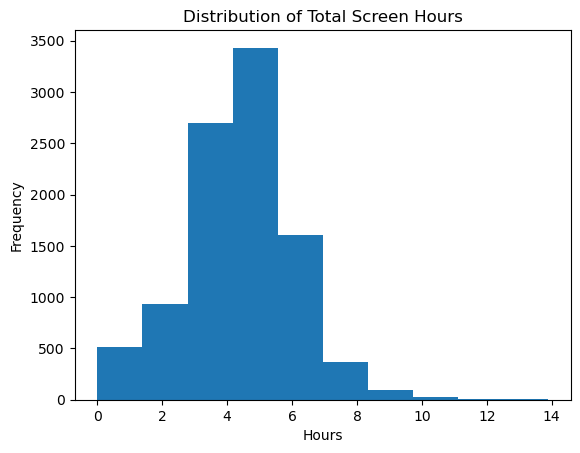

In [17]:
# UNIVARIATE ANALYSIS
# Screen Time Distribution
plt.hist(df['Avg_Daily_Screen_Time_hr'])
plt.title("Distribution of Total Screen Hours")
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.show()

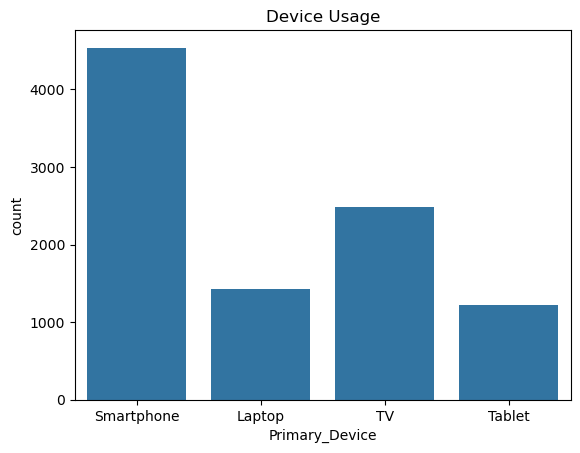

In [18]:
#Device Usage
sns.countplot(x='Primary_Device', data=df)
plt.title("Device Usage")
plt.show()

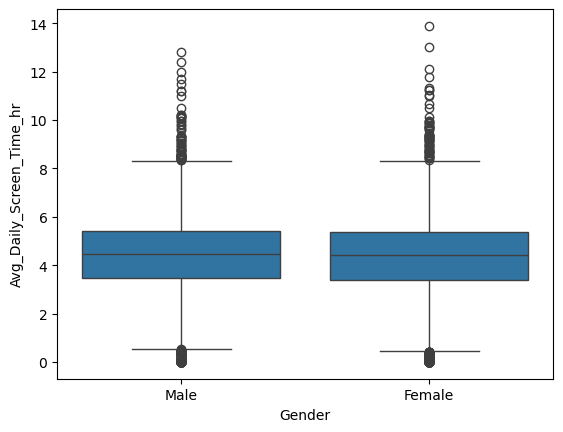

In [19]:
# BIVARIATE ANALYSIS
# Screen Time by Gender
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df)
plt.show()

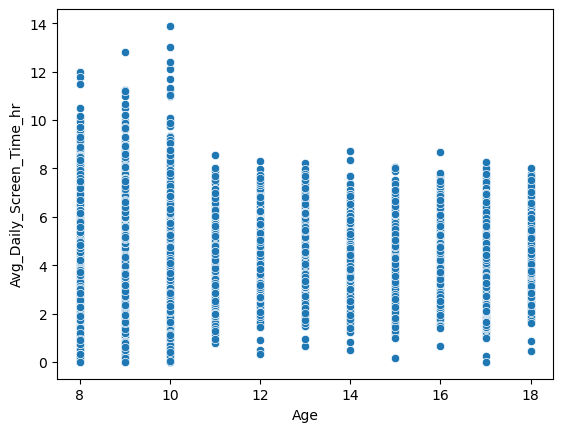

In [20]:
# Screen Time by Age
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df)
plt.show()

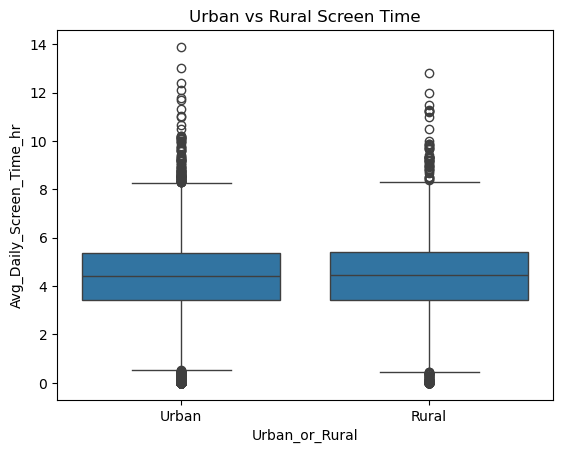

In [21]:
# Screen Time vs Urban/Rural
sns.boxplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Urban vs Rural Screen Time")
plt.show()

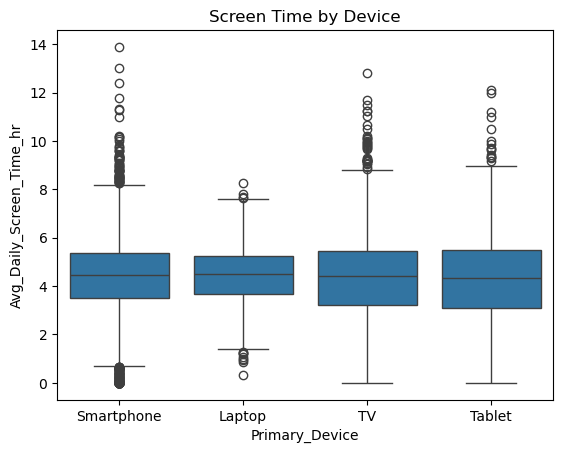

In [22]:
# Screen Time vs Device
sns.boxplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time by Device")
plt.show()

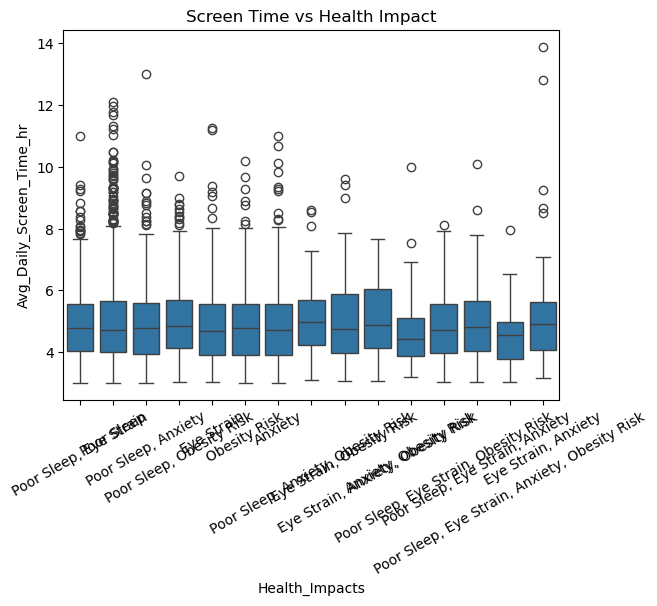

In [23]:
# Screen Time vs Health Impact
sns.boxplot(x='Health_Impacts', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time vs Health Impact")
plt.xticks(rotation=30)
plt.show()

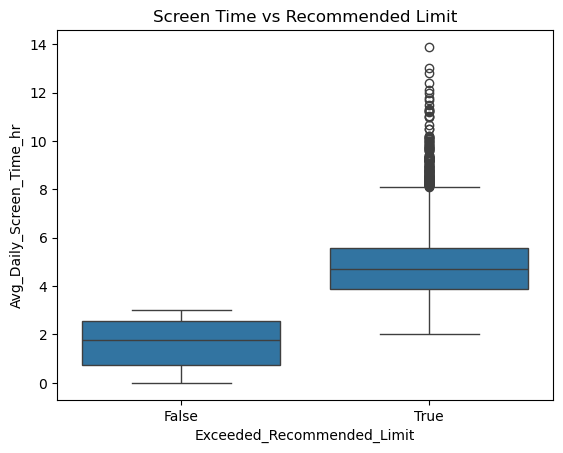

In [24]:
# Screen Time vs Limit Exceeded
sns.boxplot(x='Exceeded_Recommended_Limit', y='Avg_Daily_Screen_Time_hr', data=df)
plt.title("Screen Time vs Recommended Limit")
plt.show()

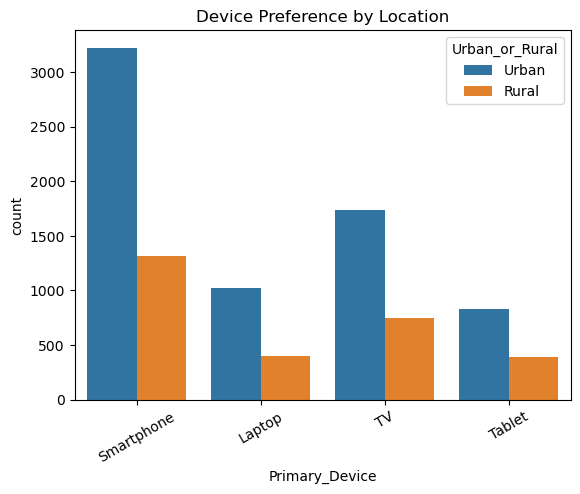

In [25]:
# Device vs Location
sns.countplot(x='Primary_Device', hue='Urban_or_Rural', data=df)
plt.title("Device Preference by Location")
plt.xticks(rotation=30)
plt.show()

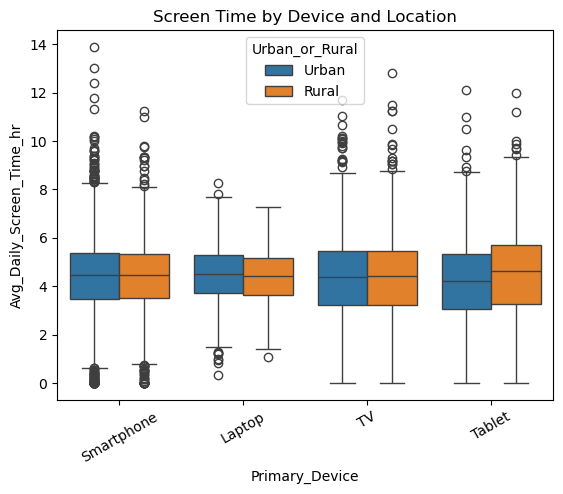

In [26]:
#MULTIVARIATE ANALYSIS
# Which device causes highest screen time in urban vs rural kids?
sns.boxplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural', data=df)
plt.xticks(rotation=30)
plt.title("Screen Time by Device and Location")
plt.show()

In [17]:
print(df["Gender"].unique())
print(df["Primary_Device"].unique())
print(df["Urban_or_Rural"].unique())
print(df["Exceeded_Recommended_Limit"].unique())
print(df["Health_Impacts"].unique())

['Male' 'Female']
['Smartphone' 'Laptop' 'TV' 'Tablet']
['Urban' 'Rural']
[ True False]
['Poor Sleep, Eye Strain' 'Poor Sleep' 'No Health Impact'
 'Poor Sleep, Anxiety' 'Poor Sleep, Obesity Risk' 'Eye Strain'
 'Obesity Risk' 'Anxiety' 'Poor Sleep, Anxiety, Obesity Risk'
 'Eye Strain, Obesity Risk' 'Eye Strain, Anxiety, Obesity Risk'
 'Anxiety, Obesity Risk' 'Poor Sleep, Eye Strain, Obesity Risk'
 'Poor Sleep, Eye Strain, Anxiety'
 'Poor Sleep, Eye Strain, Anxiety, Obesity Risk' 'Eye Strain, Anxiety']
